##Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pylab as pl
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

##Importing data from git hub

In [0]:
! git clone https://github.com/RhythemNagpal/Rhy.git

fatal: destination path 'Rhy' already exists and is not an empty directory.


##Dataframe

In [0]:
fruits = pd.read_table('Rhy/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


##Shape,Unique,GroupBy

In [0]:
print(fruits.shape)
print(fruits['fruit_name'].unique())
print(fruits.groupby('fruit_name').size())

(59, 7)
['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


##One Hot Encoding

In [0]:
y=fruits['fruit_name']
uniques= np.unique(y).tolist()
samples=fruits['fruit_name'].shape[0]
print(samples)
Y_Oh=np.zeros([samples,4])
for i in range(Y_Oh.shape[0]):
  Y_Oh[i,uniques.index(y[i])]=(1)
print(Y_Oh)

59
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


##Plotting fruits count

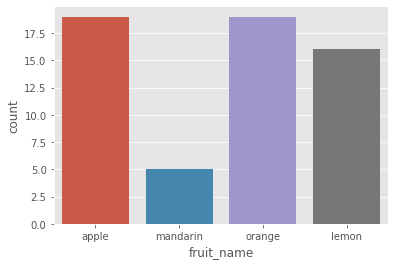

In [0]:
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

##Visualization

###Histogram

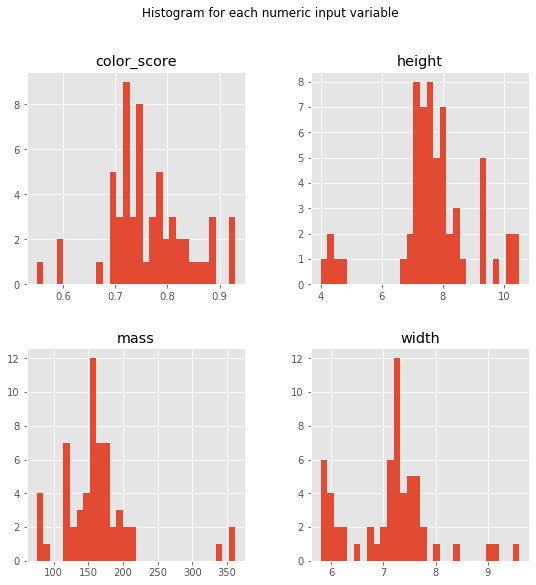

In [0]:
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

###Scatter-matrix for each input variable

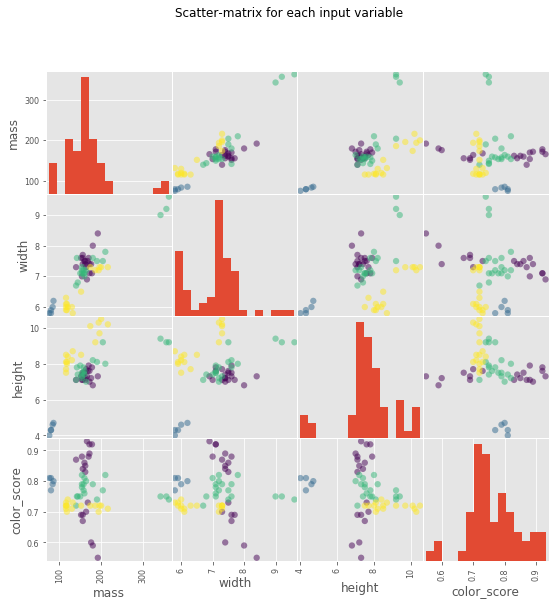

In [0]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
plt.style.use('ggplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9))
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

#Build Models

###Train and Test Split

In [0]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

##Logistic Regression

###Training

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Testing

In [0]:
y_pred_LR=logreg.predict(X_test)
print("Test set predictions:\n{}".format(y_pred_LR))

Test set predictions:
[3 4 4 1 3 1 1 3 1 1 2 1 1 1 3]


###Model Performance

In [0]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.47


###Confusion Matrix

In [0]:
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))

[[3 0 1 0]
 [0 1 0 0]
 [5 0 2 1]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.38      0.75      0.50         4
           2       1.00      1.00      1.00         1
           3       0.50      0.25      0.33         8
           4       0.50      0.50      0.50         2

    accuracy                           0.47        15
   macro avg       0.59      0.62      0.58        15
weighted avg       0.50      0.47      0.44        15



##Decision Tree

Training

In [0]:
dtree = DecisionTreeClassifier().fit(X_train, y_train)


###Testing

In [0]:
y_pred_Dtree=dtree.predict(X_test)
print("Test set predictions:\n{}".format(y_pred_Dtree))

Test set predictions:
[3 3 4 1 1 1 1 4 3 1 2 1 3 3 3]


###Model Performance

In [0]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


###Confusion Matrix

In [0]:
pred_dtree = dtree.predict(X_test)
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test, pred_dtree))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 6 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         8
           4       1.00      1.00      1.00         2

    accuracy                           0.87        15
   macro avg       0.92      0.94      0.91        15
weighted avg       0.91      0.87      0.87        15



##K-NearestNeighbors

###Training

In [0]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

###Testing

In [0]:
y_pred_knn=knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred_knn))

Test set predictions:
[3 1 1 3 1 1 3 1 1 3 2 1 1 1 4]


###Model performance

In [0]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.68
Accuracy of KNN classifier on test set: 0.47


###KNN best K

([<matplotlib.axis.XTick at 0x7f999f8f05f8>,
 <a list of 5 Text xticklabel objects>)

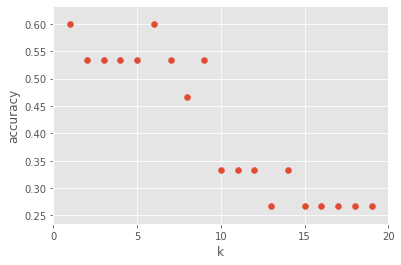

In [0]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

###Confusion Matrix

In [0]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[4 0 0 0]
 [0 0 0 1]
 [8 0 0 0]
 [2 0 0 0]]
              precision    recall  f1-score   support

           1       0.29      1.00      0.44         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2

    accuracy                           0.27        15
   macro avg       0.07      0.25      0.11        15
weighted avg       0.08      0.27      0.12        15



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Support Vector Machine

###Training

In [0]:
svm = SVC()
svm.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###Testing

In [0]:
y_pred_svm=knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred_svm))

Test set predictions:
[1 1 1 1 1 1 1 1 1 1 4 1 1 1 1]


###Model performance

In [0]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.59
Accuracy of SVM classifier on test set: 0.27


###Confusion Matrix

In [0]:
pred_svm = svm.predict(X_test)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

[[3 0 0 1]
 [0 0 0 1]
 [5 0 1 2]
 [2 0 0 0]]
              precision    recall  f1-score   support

           1       0.30      0.75      0.43         4
           2       0.00      0.00      0.00         1
           3       1.00      0.12      0.22         8
           4       0.00      0.00      0.00         2

    accuracy                           0.27        15
   macro avg       0.33      0.22      0.16        15
weighted avg       0.61      0.27      0.23        15



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
